In [13]:
import pandas as pd
import warnings
import re
import numpy as np
warnings.filterwarnings("ignore")


In [2]:
rent = pd.read_excel('../data/raw/property/combined_rent_data.xlsx')
rent = rent.drop('price_qujian', axis=1)
### drop the car park ones
property = rent[(rent['beds'] > 0) & (rent['baths'] > 0)]
### get the postcode of each property
property['postcode'] = property['address'].str.extract(r'VIC (\d{4})')
property = property.dropna()

In [3]:
### convert the price 
def extract_prices(price_str):
    prices = re.findall(r'\$([\d,]+)', price_str)
    return ', '.join(str(int(price.replace(',', ''))) for price in prices) if prices else np.nan

property['price'] = property['price'].apply(extract_prices)


In [4]:
property_df = property.dropna()
### convert the price type to int
property_df['price'] = pd.to_numeric(property_df['price'], errors='coerce')

In [5]:
### select the price range
property_final = property_df[property_df['price'] > 200]
property_final = property_final.drop_duplicates(subset=['address'])
property_final.reset_index(drop=True, inplace=True)
property_final.to_csv('../data/curated/property/property.csv')

In [6]:
### divided the data into 4
property_1 = property_final.iloc[0:2045]
property_1.to_csv('../data/curated/property/property 1.csv')
property_2 = property_final.iloc[2045:4089]
property_2.to_csv('../data/curated/property/property 2.csv')
property_3 = property_final.iloc[4089:6133]
property_3.to_csv('../data/curated/property/property 3.csv')
property_4 = property_final.iloc[6133:]
property_4.to_csv('../data/curated/property/property 4.csv')

### some basic graphs

In [16]:
data = pd.read_csv('../data/curated/property/property.csv',index_col=0)

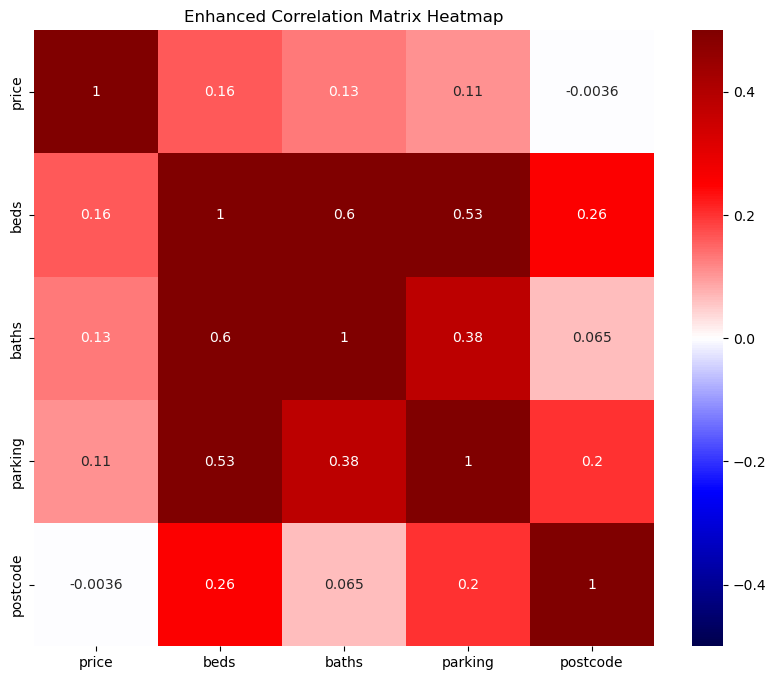

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

desc_stats = data.describe()

numeric_columns = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

### Draw a correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="seismic", center=0, vmin=-0.5, vmax=0.5)
plt.title('Enhanced Correlation Matrix Heatmap')
plt.savefig('../plots/heatmap_inner.png')
plt.show()


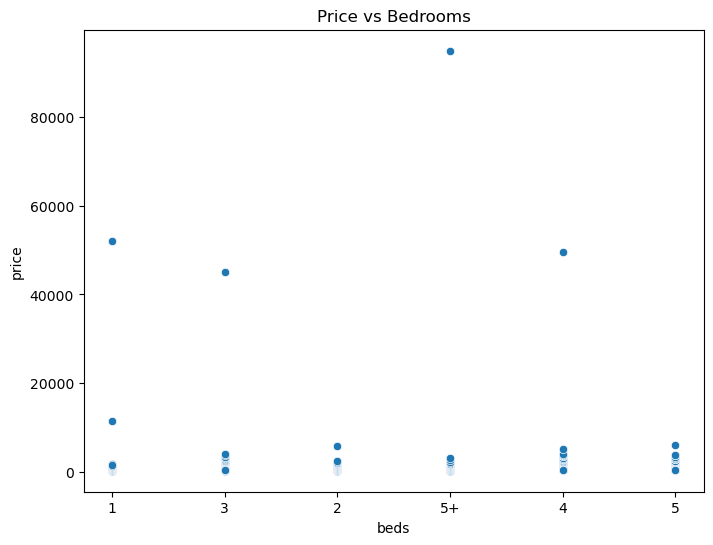

In [14]:
### Scatter Chart - Price vs Bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='beds', y='price', data=data)
plt.title('Price vs Bedrooms')
plt.show()

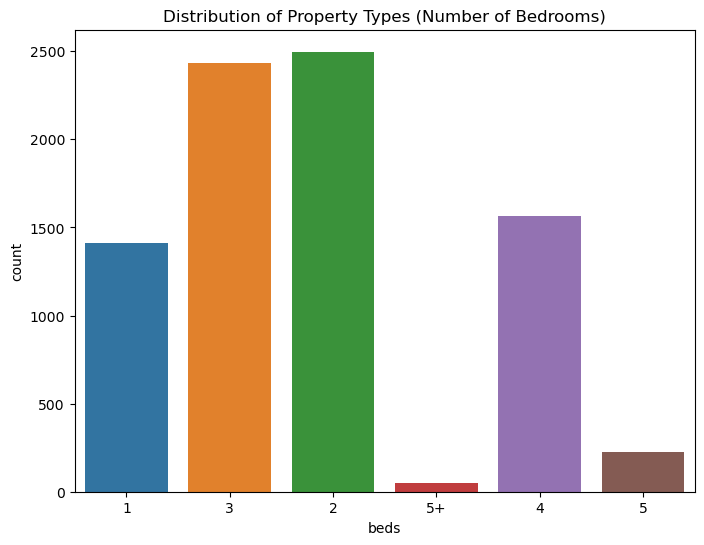

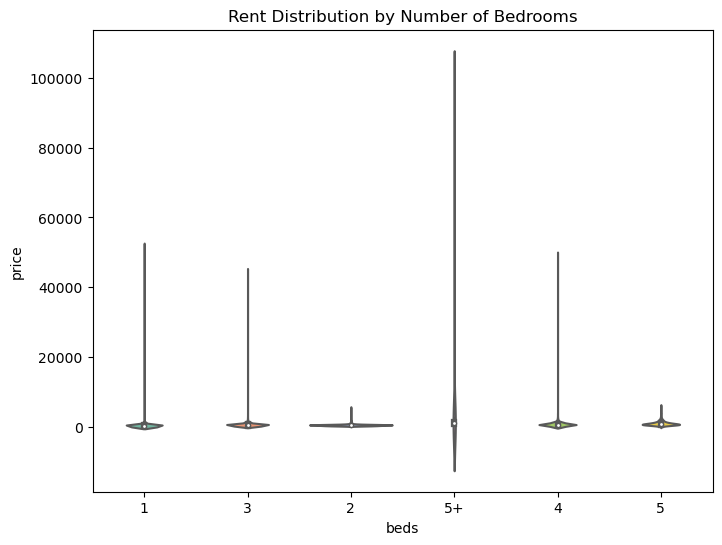

In [15]:
### Bar Chart - Distribution of Different Property Types (Based on Number of Bedrooms)
plt.figure(figsize=(8, 6))
sns.countplot(x='beds', data=data)
plt.title('Distribution of Property Types (Number of Bedrooms)')
plt.show()

### Colorful violin chart - Rent distribution of different bedroom quantities
plt.figure(figsize=(8, 6))
sns.violinplot(x='beds', y='price', data=data, palette="Set2")
plt.title('Rent Distribution by Number of Bedrooms')
plt.show()


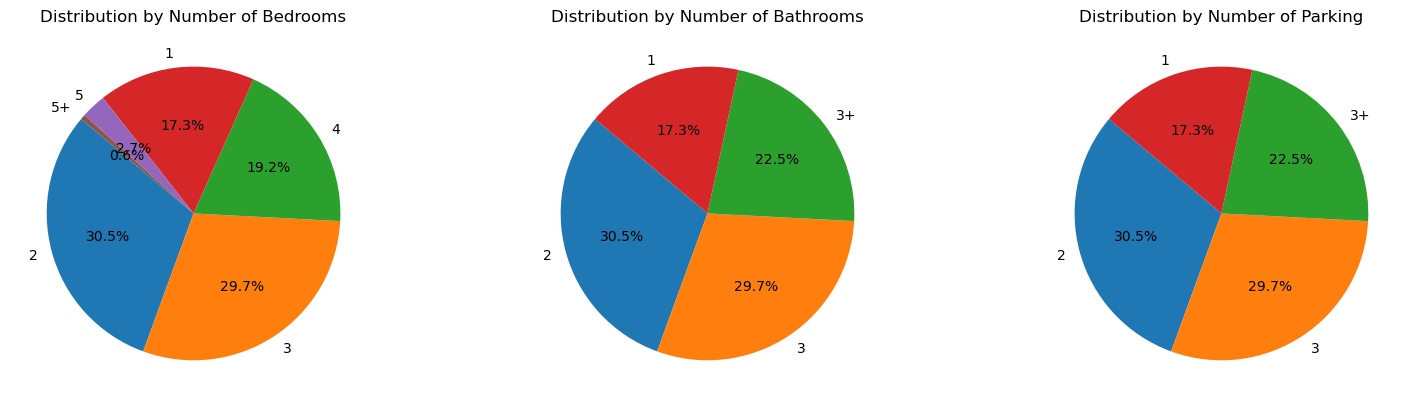

In [10]:
import matplotlib.pyplot as plt
data['beds'] = pd.to_numeric(data['beds'], errors='coerce')
data['baths'] = pd.to_numeric(data['beds'], errors='coerce')
data['parking'] = pd.to_numeric(data['beds'], errors='coerce')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)
### bedrooms
data['beds'] = data['beds'].apply(lambda x: '5+' if x > 5 else str(x))
bedroom_distribution = data['beds'].value_counts()
axes[0].pie(bedroom_distribution, labels=bedroom_distribution.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution by Number of Bedrooms')
### bathroom
data['baths'] = data['baths'].apply(lambda x: '3+' if x > 3 else str(x))
bathroom_distribution = data['baths'].value_counts()
axes[1].pie(bathroom_distribution, labels=bathroom_distribution.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution by Number of Bathrooms')
### parkings
data['parking'] = data['parking'].apply(lambda x: '3+' if x > 3 else str(x))
parking_distribution = data['parking'].value_counts()
axes[2].pie(parking_distribution, labels=parking_distribution.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Distribution by Number of Parking')

plt.show()


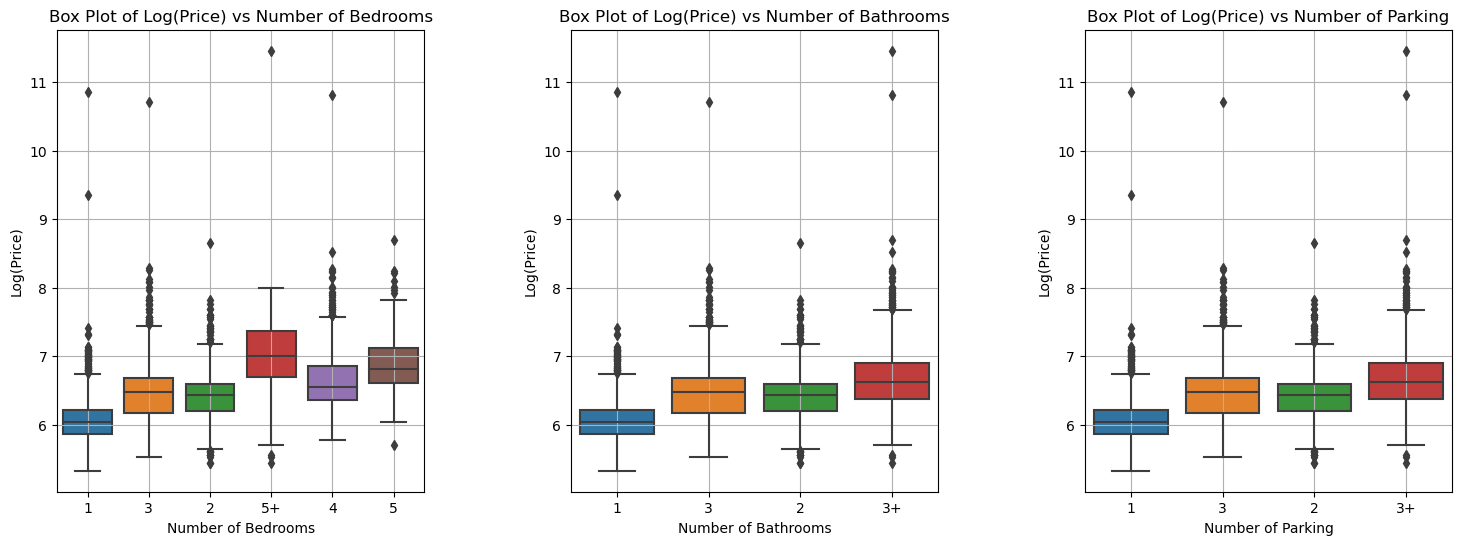

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data['log_price'] = np.log1p(data['price'])  


### Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

### Plot the box plot in the second subplot (axes[1])
sns.boxplot(ax=axes[0], x='beds', y='log_price', data=data)
axes[0].set_title('Box Plot of Log(Price) vs Number of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Log(Price)')
axes[0].grid(True)

sns.boxplot(ax=axes[1], x='baths', y='log_price', data=data)
axes[1].set_title('Box Plot of Log(Price) vs Number of Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Log(Price)')
axes[1].grid(True)

sns.boxplot(ax=axes[2], x='parking', y='log_price', data=data)
axes[2].set_title('Box Plot of Log(Price) vs Number of Parking')
axes[2].set_xlabel('Number of Parking')
axes[2].set_ylabel('Log(Price)')
axes[2].grid(True)

### Show the figure with all subplots
plt.show()


In [12]:
postcode_counts = property_final['postcode'].value_counts().reset_index()
postcode_counts.columns = ['postcode', 'counts']
postcode_counts

,postcode,counts
0,3000,480
1,3006,293
2,3141,153
3,3182,135
4,3350,133
...,...,...
387,3992,1
388,3882,1
389,3701,1
390,3954,1
